In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from tqdm.notebook import tqdm


In [2]:
import sys
sys.path.append('../')
from corrfunc import compute_corr, C

In [3]:
def plot_Cls(Cls, nside_out=128, plot_corr=False):
    
    Cls2 = 10*np.array(Cls)
    xmin = np.degrees(hp.nside2resol(nside_out))
    
    m = hp.synfast(Cls, nside_out, new=True) #non-scaled Cls map
    m2 = hp.synfast(Cls2, nside_out, new=True) #scaled Cls map
    
    x = np.linspace(xmin,15,100) #x for legendre
    
    y = [C(theta, Cls) for theta in x] #legendre without scaling
    y2 = [C(theta, Cls2) for theta in x] #legendre with scaling
    
    Y_bruteforce = []
    ERR_bruteforce = []
    
    if plot_corr:
        x_corr = np.linspace(xmin,15, 15) #x for bruteforce
        thicknesses = (1/2)*np.append(x_corr[1:]-x_corr[:-1], x_corr[-1]-x_corr[-2])
        out = [compute_corr(m,m,R,dr) for R, dr in tqdm(zip(x_corr, thicknesses), total=x_corr.size)]
        out2 = [compute_corr(m2,m2,R,dr) for R,dr in tqdm(zip(x_corr, thicknesses), total=x_corr.size)]
        y_corr, err_corr = zip(*out)
        Y_bruteforce.append(np.array(list(y_corr)))
        ERR_bruteforce.append(np.array(list(err_corr)))
        y_corr, err_corr = zip(*out2)
        Y_bruteforce.append(np.array(list(y_corr)))
        ERR_bruteforce.append(np.array(list(err_corr)))
        
    plt.figure(figsize=(8,6))
    
    if plot_corr:
        plt.errorbar(x_corr, Y_bruteforce[0], yerr=ERR_bruteforce[0], label='compute_corr')
        plt.errorbar(x_corr, Y_bruteforce[1], yerr=ERR_bruteforce[1], label='compute_corr scaled')
        
    plt.plot(x, y, label='legendre')
    plt.plot(x,y2, label='legendre scaled')
    plt.xlabel('Degrees')
    plt.ylabel('Correlation')
    
    if plot_corr:  
        return x_corr, x, Y_bruteforce, ERR_bruteforce, y, y2
    else:
        return y

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


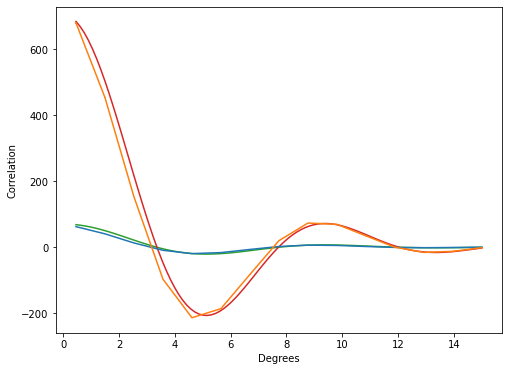

In [5]:
x_corr, x, Y_bruteforce, ERR_bruteforce, y, y2 = plot_Cls([np.exp(-0.1*x**2)*(np.sin(x))**2 for x in np.linspace(-10,10,80)], plot_corr=True)

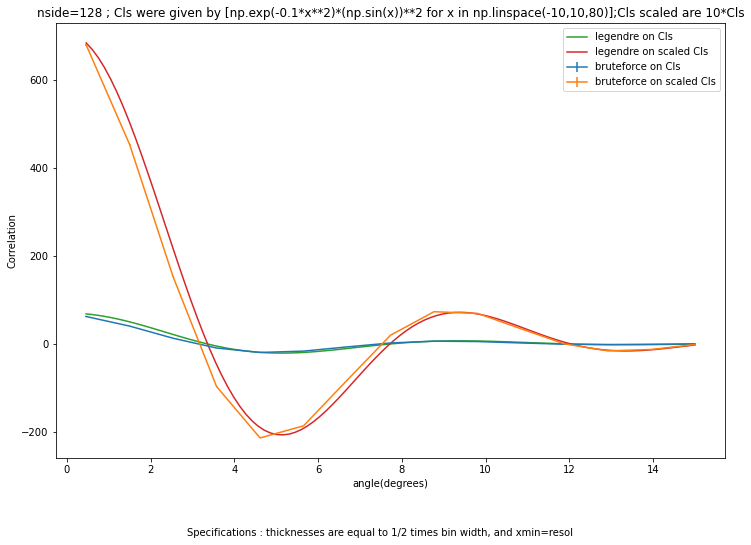

In [24]:
fig=plt.figure(figsize=(12,8))
plt.xlabel('angle(degrees)')
plt.ylabel('Correlation')
plt.title('nside=128 ; Cls were given by [np.exp(-0.1*x**2)*(np.sin(x))**2 for x in np.linspace(-10,10,80)];Cls scaled are 10*Cls') #CHANGE Cls DESCRIPTION
txt = 'Specifications : thicknesses are equal to 1/2 times bin width, and xmin=resol'
fig.text(.5, -0.01, txt, ha='center')

plt.errorbar(x_corr, Y_bruteforce[0],yerr=ERR_bruteforce[0], label='bruteforce on Cls')
plt.errorbar(x_corr, Y_bruteforce[1], yerr=ERR_bruteforce[1], label='bruteforce on scaled Cls')

plt.plot(x, y, label='legendre on Cls')
plt.plot(x,y2, label='legendre on scaled Cls')
plt.legend()

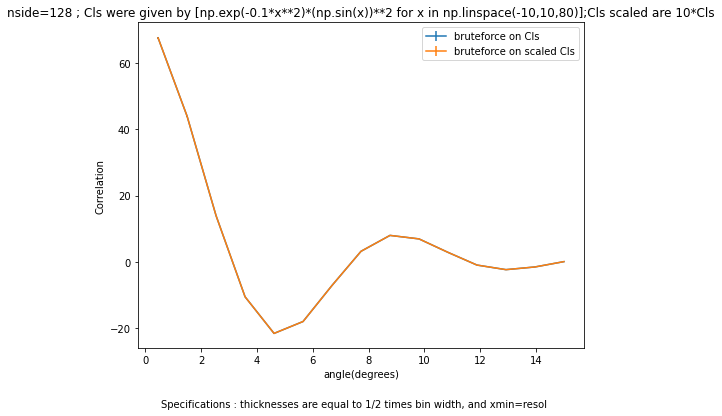

In [29]:
fig=plt.figure(figsize=(8,6))
plt.xlabel('angle(degrees)')
plt.ylabel('Correlation')
plt.title('nside=128 ; Cls were given by [np.exp(-0.1*x**2)*(np.sin(x))**2 for x in np.linspace(-10,10,80)];Cls scaled are 10*Cls') #CHANGE Cls DESCRIPTION
txt = 'Specifications : thicknesses are equal to 1/2 times bin width, and xmin=resol'
fig.text(.5, -0.01, txt, ha='center')

plt.errorbar(x_corr, Y_bruteforce[0],yerr=ERR_bruteforce[0], label='bruteforce on Cls')
plt.errorbar(x_corr, Y_bruteforce[1], yerr=ERR_bruteforce[1], label='bruteforce on scaled Cls')

plt.legend()

In [196]:
#testing same thing for different bin width ; guess is smaller bin width captures more precisely the variations in the correlation values

In [ ]:
#right now, its clear that larger bin width leads to imprecisions

In [ ]:
#now testing how scaling the Cls affects my correlation function. For the legendre function, it is a direct multiplication factor (linear).

#scaling the Cls by 10 affects the compute_corr in the following way : It also scales by factor of 10 approximately
#Results show that averaging of scaling factor over y values gives ~ 9.6 +- 0.9
#So the compute_corr function IS sensitive to scaled Cls. We must now understand the 

In [11]:
Cls = np.array([np.exp(-0.1*x**2)*(np.sin(x))**2 for x in np.linspace(-10,10,80)])

In [16]:
m1 = hp.synfast(Cls, 128, new=True)
m2 = hp.synfast(10*Cls, 128, new=True)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [21]:
hp.anafast(m1, lmax=80)

array([1.60295995e-06, 4.98013588e-06, 1.49083246e-07, 3.79260438e-06,
       7.50030152e-05, 1.82517377e-04, 7.88120140e-04, 6.23398096e-04,
       1.00642375e-03, 2.76551042e-03, 3.22317317e-03, 4.41640753e-03,
       2.96456718e-03, 1.74103707e-03, 3.15985324e-04, 9.03626611e-05,
       4.33399986e-03, 7.47358851e-03, 4.63473697e-02, 4.63976128e-02,
       6.94942646e-02, 7.53317917e-02, 1.51422617e-01, 1.41418892e-01,
       8.70367161e-02, 7.15168076e-02, 2.54018850e-02, 1.88325277e-04,
       2.26027707e-02, 1.65147105e-01, 2.85059088e-01, 4.51838472e-01,
       9.10371627e-01, 5.67151836e-01, 6.77429068e-01, 7.94092205e-01,
       4.81718491e-01, 3.99009880e-01, 1.09493620e-01, 1.78065676e-02,
       1.45063023e-02, 1.40000519e-01, 3.74312868e-01, 5.51886687e-01,
       6.00373712e-01, 8.91416938e-01, 6.97999438e-01, 4.69472876e-01,
       4.66982016e-01, 3.26678042e-01, 1.31485683e-01, 2.18479513e-02,
       1.73025613e-04, 2.60964011e-02, 7.01896474e-02, 8.77317829e-02,
      